### **CREDIT DEFAULT ANALYSIS**

Credit default in Taiwan from April 2005 to September 2005



###  **1. Import data**

In [27]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Credit_data.csv', index_col=['ID'])
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
7,140000,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
8,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0
9,200000,2,3,2,34,0,0,2,0,0,...,2513.0,1828.0,3731.0,2306.0,12.0,50.0,300.0,3738.0,66.0,0


**DESCRIPTION OF DATA**

The data set has 24000 rows and 25 columns (equivalent to 25 variables):

• ID: ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• MARRIAGE: Marital status (1=married, 2=single, 3=others)

• AGE: Age in years

• PAY_0: Repayment status in September, 2005 (-2 = Balance paid in full and no transactions this period, -1= Balance paid in full, but occurs transaction this period, 0 = Paid the minimum due amount, but not the entire balance, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default_0: Default payment next month (1=Default, 0= Not default)

In [29]:
pay = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    76498
-1    28068
-2    19524
 2    15134
 1     2937
 3     1116
 4      352
 7      176
 5      110
 6       59
 8       26
Name: value, dtype: int64


For credit default analysis, we pay attention to the delay payment which is labeled as number from 1 to 8 (equivalent 1-month-delay to 8-month-delay)

### **2. Cleansing data**

In [ ]:
#Checking null value => No null value in data set
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default_0    0
dtype: int64

In [ ]:
#Checking duplicate value => No duplicated value
df.duplicated()

ID
1        False
2        False
3        False
4        False
5        False
         ...  
23996    False
23997    False
23998    False
23999    False
24000    False
Length: 24000, dtype: bool

In [ ]:
#Correlation between variables
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
LIMIT_BAL,1.000000,0.021180,-0.218270,-0.101714,0.144507,-0.268426,-0.294676,-0.284380,-0.265448,-0.247575,...,0.290353,0.290489,0.286108,0.193520,0.173436,0.205204,0.199620,0.218101,0.218140,-0.150709
SEX,0.021180,1.000000,0.012263,-0.026336,-0.101431,-0.055700,-0.069304,-0.068161,-0.060089,-0.053890,...,-0.019951,-0.013580,-0.013299,0.000644,0.001298,-0.010413,0.000425,-0.000465,-0.003797,-0.042947
EDUCATION,-0.218270,0.012263,1.000000,-0.145358,0.176561,0.104571,0.119802,0.110544,0.106165,0.095527,...,-0.000030,-0.008038,-0.009181,-0.035289,-0.031329,-0.040020,-0.041435,-0.040332,-0.037872,0.026885
MARRIAGE,-0.101714,-0.026336,-0.145358,1.000000,-0.416894,0.019407,0.022402,0.033555,0.032382,0.036423,...,-0.020691,-0.024526,-0.019138,-0.005835,-0.006871,-0.001834,-0.012067,-0.000706,-0.002401,-0.024888
AGE,0.144507,-0.101431,0.176561,-0.416894,1.000000,-0.042074,-0.048828,-0.052082,-0.048990,-0.057105,...,0.052435,0.049805,0.047265,0.026669,0.022704,0.030798,0.020158,0.018961,0.022430,0.013450
PAY_1,-0.268426,-0.055700,0.104571,0.019407,-0.042074,1.000000,0.671551,0.571972,0.539503,0.510225,...,0.184385,0.185452,0.181012,-0.077027,-0.064965,-0.064386,-0.066933,-0.055933,-0.055712,0.323410
PAY_2,-0.294676,-0.069304,0.119802,0.022402,-0.048828,0.671551,1.000000,0.765295,0.660569,0.622181,...,0.223473,0.222790,0.221099,-0.079226,-0.057988,-0.051197,-0.047229,-0.035467,-0.033829,0.259680
PAY_3,-0.284380,-0.068161,0.110544,0.033555,-0.052082,0.571972,0.765295,1.000000,0.778626,0.687794,...,0.228636,0.226740,0.224067,0.004302,-0.063477,-0.047507,-0.046759,-0.035829,-0.034050,0.234374
PAY_4,-0.265448,-0.060089,0.106165,0.032382,-0.048990,0.539503,0.660569,0.778626,1.000000,0.818549,...,0.247250,0.244604,0.240982,-0.007009,-0.002460,-0.068376,-0.043696,-0.033070,-0.026423,0.216989
PAY_5,-0.247575,-0.053890,0.095527,0.036423,-0.057105,0.510225,0.622181,0.687794,0.818549,1.000000,...,0.273299,0.271816,0.264483,-0.004656,-0.003471,0.010366,-0.058308,-0.033591,-0.022649,0.206612


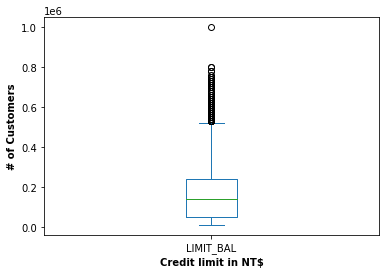

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
ID,,,,,,,,,,,,,,,,,,,,,
1769,1000000,2,1,1,47,0,0,0,-1,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [30]:
#Identify outliers
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers
#There is 1 outlier in the data set, which is a customer who has 1000000 limit balance and has an excellent payment history => Should be consider as a valid data


In [ ]:
#Change value SEX column:  1 to female and 2 to male 
df['SEX']=df['SEX'].replace(to_replace = [1,2], value=['Male', 'Female']).astype('category')
df['SEX'].value_counts()

Female    14422
Male       9578
Name: SEX, dtype: int64

In [ ]:
#Change value EDUCATION column: 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others
df['EDUCATION'].unique
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    11213
1     8486
3     3944
0      357
Name: EDUCATION, dtype: int64

In [ ]:
#Change value MARRIAGE column
df["MARRIAGE"].unique()
#Combine value 0 and 3 by changing the value 0 to 3
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df['MARRIAGE'].value_counts()

2    12808
1    10897
3      295
Name: MARRIAGE, dtype: int64

### **3.EDA**

In [31]:
# Create a new column "HAS_DEFAULT" to indicate customers who have at least 1 default payment from PAY_1 to Pay_6 and define 0 as no default and 1 as has default
default_case = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1) 
df.loc[default_case, "HAS_DEFAULT"] = 1
df.loc[df.HAS_DEFAULT.isna(), "HAS_DEFAULT"] = 0

In [32]:
# Define a function to plot stacked bar chart 
def create_stacked_bar(column_name):
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEFAULT'],columns = df[column_name], normalize = 'columns')
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(12, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name, color = 'cornflowerblue')
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name, color = 'red')  

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=0)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()


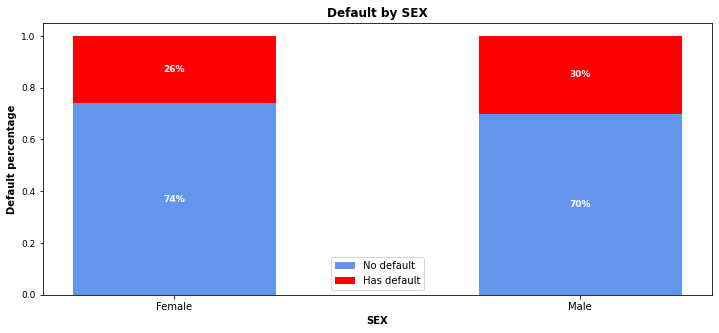

In [ ]:
# Plot a stacked bar chart to visualize default percentage by female and male
create_stacked_bar('SEX')


=> 30% male have default payment while 26% female have default payment, the difference is not significant.

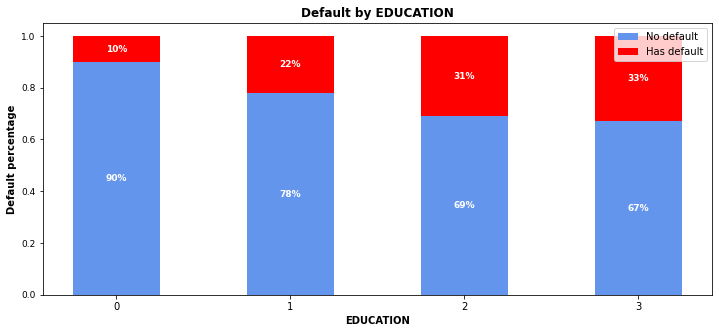

In [ ]:
# Plot a stacked bar chart to show default by education level
create_stacked_bar('EDUCATION')

=> The result above indicates that customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education did.

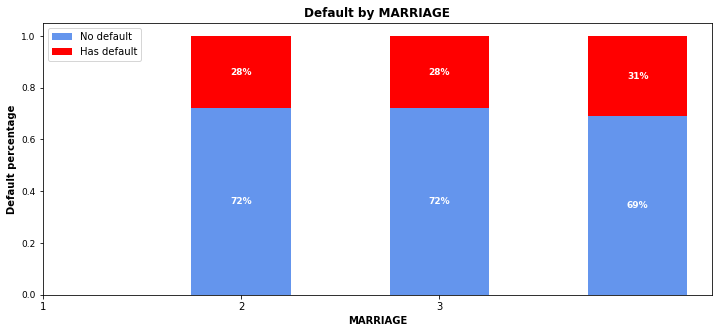

In [ ]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status 
create_stacked_bar('MARRIAGE')

=> There is no difference of default risk in terms of marital status, although the 'other'marital status group had a little higher default percentage.

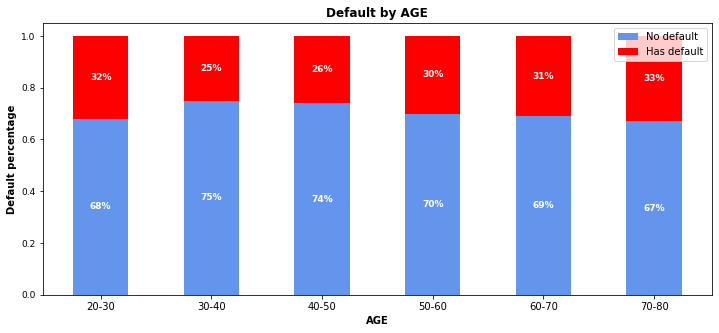

In [ ]:
bins= [20,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)
create_stacked_bar('AGE')

Customers aged between 30-50 had the lowest delayed payment rate (25%), while older groups (50-70) all had higher delayed payment rates. The highest delayed payment rate belongs to the youngest group (20-30 years old) and the oldest group (70-80 years old)

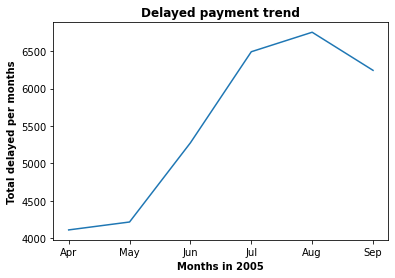

In [ ]:
#Delayed payment trend
default_month = df[df['HAS_DEFAULT']== 1]
default_trend = default_month[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed per months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

There was a huge jump from May 2005 to July, 2005 when delayed payment increased significantly, then it peaked at August 2005 with 6755 cases, things started to get better in September 2005

### **4. Modeling**

### Import libraries

In [101]:
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

### Prepare for modeling

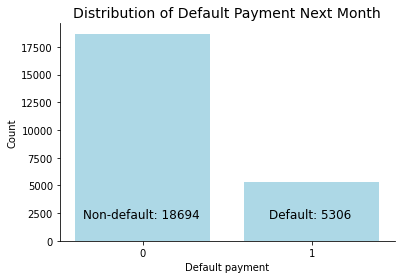

In [34]:
#Distribution of default next month => The data is highly imbalanced. For default prediction, we need to pay more attention on the minority class, which preditc the defaulter
values = df['default_0']
val,count = np.unique(values, return_counts=True)

fig, ax = plt.subplots()
ax.bar(x=range(len(val)), height=count, color = 'lightblue')

ax.annotate(f'Non-default: {count[0]}', xy=(-0.3, 15000), xytext=(-0.35, 2000), size=12)
ax.annotate(f'Default: {count[1]}', xy=(0.75, 15000), xytext=(0.75, 2000), size=12)
ax.set_ylabel('Count')
ax.set_xlabel('Default payment')
ax.set_title('Distribution of Default Payment Next Month', size=14)
ax.set_xticks(range(len(val)))
ax.set_xticklabels(val)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [36]:
# Define predictor variables and target variable
X = df.drop(columns=['default_0'])
y = df['default_0']
# Save all feature names as list
feature_cols = X.columns.tolist() 
# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist() 

In [37]:
# Define function to split data with and without SMOTE 
def data_split(X, y, imbalance = False):
    # split data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
    
    if imbalance:
        # use SMOTE to over sample data
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state = 42)
        X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
    
    return X_train, X_test, y_train, y_test

In [38]:
# Define function to rescale training data using StandardScaler
def standard_scaler(X_train, X_test, numerical_cols):
    # Make copies of dataset
    X_train_std = X_train.copy()
    X_test_std = X_test.copy()
    # Apply standardization on numerical features only
    for i in numerical_cols:
        scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
        X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
        X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the testing data columns
    
    return X_train_std,X_test_std

### Classification modeling prediction

### **LOGISTIC REGRESSION**

In [82]:
def run_logistic_regression(imbalance=False):
    # Split data  
    X_train, X_test, y_train, y_test = data_split(X, y, imbalance = imbalance)

    # Rescale data
    X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)
    
    # Instantiate model
    clf_lr = LogisticRegression(random_state=42)
    
    # Fit the model
    clf_lr.fit(X_train_std, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_lr, X_train_std, y_train, scoring ="roc_auc", cv = 5)
    roc_auc_lr = np.mean(scores)
    
    if imbalance:
        return "Logistic Regression", "With SMOTE", roc_auc_lr
    else:
        return "Logistic Regression", "Without SMOTE", roc_auc_lr

model_result = []
model_result.append(run_logistic_regression())
model_result.append(run_logistic_regression(imbalance=True))

pd.DataFrame(model_result, columns = ["Model", "SMOTE", "ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,Logistic Regression,Without SMOTE,0.743889
1,Logistic Regression,With SMOTE,0.811314


Since SMOTE sampling yields a much better ROC_AUC score on training data, we will use SMOTE while tuning the model.

In [60]:
# Randomized search for the best C parameter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Split data with SMOTE 
X_train, X_test, y_train, y_test = data_split(X, y, imbalance = True) 

# Rescale data
X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=42)

lr_best= clf.fit(X_train_std, y_train)   

print(lr_best.best_params_)

{'C': 2.832290311184182, 'penalty': 'l1'}


In [61]:
# Save tuned model and parameters

joblib.dump(lr_best,"logreg_sm_tuned.pkl") 

['logreg_sm_tuned.pkl']

In [62]:
lr_best = joblib.load("logreg_sm_tuned.pkl")

In [63]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(lr_best, X_train_std, y_train, scoring = "roc_auc", cv = 5)
roc_auc_lr_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best:.3f}')

ROC_AUC score after tuning parameters:0.802


In [64]:
# Save best ROC_AUC 

joblib.dump(roc_auc_lr_best,"logreg_ROC_AUC_CV.pkl") 

['logreg_ROC_AUC_CV.pkl']

In [65]:
roc_auc_lr_best = joblib.load("logreg_ROC_AUC_CV.pkl")
roc_auc_lr_best

0.8023793958143541

After fine-tuning parameter C, Logistic Regression model got ROC_AUC training score as 0.800, slightly decreased from original score 0.802. This could mean model is less overfitting the training data

In [66]:
# Define a function to compute Precision, Recall and F1 score
def get_pre_rec_f1(model,X_test,y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [67]:
# Calculate precision and recall of Logistic Regression model
print('Logistic Regression model on test data:')
get_pre_rec_f1(lr_best, X_test_std, y_test)

Logistic Regression model on test data:
Precision:0.438
Recall:0.620
F1 score:0.513


### Model Performance:
The business nature of credit card default analysis requires model to have a high recall. Logstic Regression model has a recall as 0.620

### **RANDOM FOREST**

In [50]:
def run_random_forest(imbalance=False):
    # Split data  
    X_train, X_test, y_train, y_test = data_split(X, y, imbalance = imbalance)
    
    # Instantiate model
    clf_rf = RandomForestClassifier()
   
    # Fit the model
    clf_rf.fit(X_train, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
    roc_auc_rf = np.mean(scores)
    
    if imbalance:
        return "Random Forest", "With SMOTE", roc_auc_rf
    else:
        return "Random Forest", "Without SMOTE", roc_auc_rf

model_result = []
model_result.append(run_random_forest())
model_result.append(run_random_forest(imbalance=True))

pd.DataFrame(model_result, columns = ["Model", "SMOTE", "ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,Random Forest,Without SMOTE,0.759770
1,Random Forest,With SMOTE,0.928211


SMOTE sampling has a better performance. With the default parameters, Random Forest model generated ROC-AUC score 0.928 on training data, which is better than Logistic Regression model.

In [51]:
# Split data with SMOTE
X_train_sm, X_test, y_train_sm, y_test = data_split(X, y, imbalance = True)
# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train_sm, y_train_sm)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [52]:
# Save tuned model

joblib.dump(grid_search,"RandomForest_tuned_final.pkl")

['RandomForest_tuned_final.pkl']

In [53]:
grid_search = joblib.load("RandomForest_tuned_final.pkl")

In [54]:
# Use the best parameters to fit the model

rf_best = RandomForestClassifier(**grid_search.best_params_)   
rf_best.fit(X_train_sm,y_train_sm)

scores_best = cross_val_score(rf_best, X_train_sm, y_train_sm, scoring ="roc_auc", cv = 5)
roc_auc_best = np.mean(scores_best)

print(f'ROC_AUC training score after tuning for Random Forest: {roc_auc_best:.3f}') 

ROC_AUC training score after tuning for Random Forest: 0.920


In [55]:
# Compute precision, recall and F1 score of Random Forest model on test data

print('Random Forest model on test data:')
get_pre_rec_f1(rf_best, X_test, y_test)

Random Forest model on test data:
Precision:0.551
Recall:0.487
F1 score:0.517


### Model Performance:

Random Forest has recall rate as 0.487 and F1 score as 0.517.

### **XGBOOST**

In [39]:
def run_xgboost(imbalance=False):
    # Split data  
    X_train, X_test, y_train, y_test = data_split(X, y, imbalance = imbalance)
    
    # Instantiate model with default parameters
    clf_xgb = XGBClassifier()
    
    # Fit the model
    clf_xgb.fit(X_train, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
    roc_auc_xgb = np.mean(scores)
    
    if imbalance:
        return "XGBoost", "With SMOTE", roc_auc_xgb
    else:
        return "XGBoost", "Without SMOTE", roc_auc_xgb

    
model_result = []
model_result.append(run_xgboost())                  
model_result.append(run_xgboost(imbalance=True))    

pd.DataFrame(model_result, columns = ["Model", "SMOTE", "ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,XGBoost,Without SMOTE,0.759369
1,XGBoost,With SMOTE,0.911658


In [40]:
# Sampling and split data with SMOTE
X_train_sm, X_test, y_train_sm, y_test = data_split(X, y, imbalance = True)

In [41]:
# Instantiate models with initial best guess parameters

params = { 
    'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}
    
# Instantiate model
clf_xgb = XGBClassifier(**params)

# Use model's initial parameters to get cross validation score
scores = cross_val_score(clf_xgb, X_train_sm, y_train_sm, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)

print(f'ROC_AUC training score with initial best parameters for XGBoost: {roc_auc_xgb:.3f}')

ROC_AUC training score with initial best parameters for XGBoost: 0.883


In [42]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
pprint(random_grid_xgb)

{'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'max_depth': [3, 4, 5, 6, 7],
 'n_estimators': array([200, 400, 600, 800]),
 'scale_pos_weight': [1, 3.5],
 'subsample': array([0.5, 0.6, 0.7, 0.8])}


In [43]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train_sm, y_train_sm)   
xgb_random.best_params_, xgb_random.best_score_

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.6, 'scale_pos_weight': 3.5, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7999999999999999} 0.9113338361965212


In [44]:
# Save tuned model for future use

joblib.dump(xgb_random,'xgb_random_final.pkl')

['xgb_random_final.pkl']

In [45]:
# Compute precision, recall and F1 score of tuned XGBoost model on test data

print('XGBoost model on test data:')
get_pre_rec_f1(xgb_random, X_test, y_test)

XGBoost model on test data:
Precision:0.459
Recall:0.488
F1 score:0.473


**Model Performance:**

XGBoost has recall rate as 0.488 and F1 score as 0.473.

### MODEL COMPARISON

**CONFUSION MATRIX**

Text(0.5, 1.0, 'XGBoost')

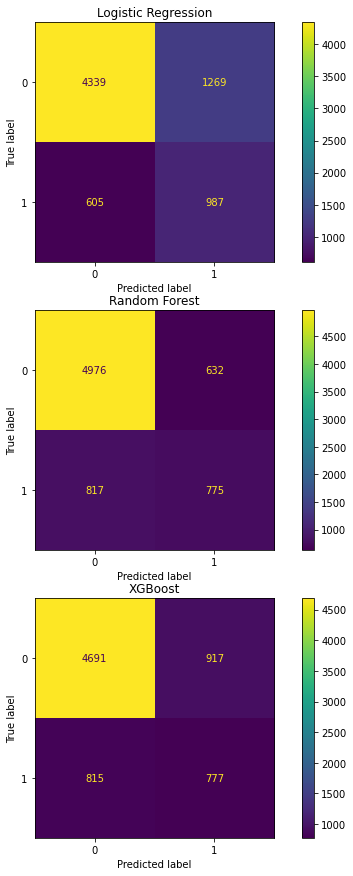

In [95]:
fig,ax=plt.subplots(3,1, figsize=(10,15))

ConfusionMatrixDisplay.from_estimator(lr_best, X_test_std, y_test, ax = ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(rf_best, X_test, y_test, ax = ax[1])
ax[1].set_title("Random Forest")

ConfusionMatrixDisplay.from_estimator(xgb_random, X_test, y_test, ax = ax[2])
ax[2].set_title("XGBoost")


**ROC_AUC CURVE**

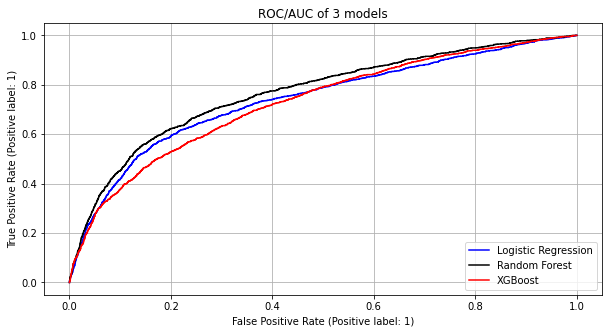

In [99]:
# Plot ROC_AUC curve of 3 models
 
fig,ax=plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(lr_best, X_test_std, y_test,ax=ax, color="blue",label='Logistic Regression')
RocCurveDisplay.from_estimator(rf_best, X_test, y_test,ax=ax, color="black",label='Random Forest')
RocCurveDisplay.from_estimator(xgb_random, X_test, y_test,ax=ax, color="red",label='XGBoost')

plt.title('ROC/AUC of 3 models')
plt.grid()

**PRECISION - RECALL CURVE**

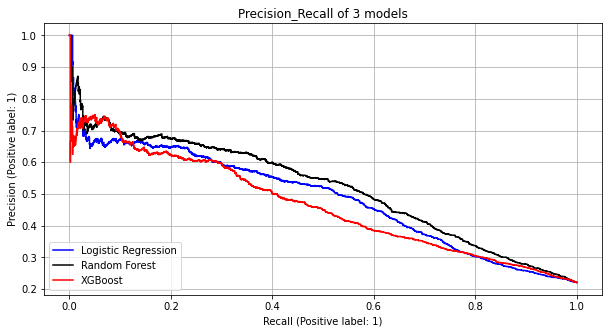

In [102]:
# Compare 3 models' Precision_recall curves
fig,ax=plt.subplots(figsize=(10,5))

PrecisionRecallDisplay.from_estimator(lr_best, X_test_std, y_test, ax=ax,color="blue",label='Logistic Regression')
PrecisionRecallDisplay.from_estimator(rf_best, X_test, y_test, ax=ax,color="black",label='Random Forest')
PrecisionRecallDisplay.from_estimator(xgb_random, X_test, y_test, ax=ax,color="red",label='XGBoost')

plt.title('Precision_Recall of 3 models')
plt.grid()

COMPARE MODELS WITH DUMMIES

In [107]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
y_pred_dummy = dummy_clf.predict(X_test)

print('     Dummy model:')
get_pre_rec_f1(dummy_clf, X_test, y_test)

# Print precision and recall of Logistic Regression model
print('     Logistic Regression model on test data:')
get_pre_rec_f1(lr_best, X_test_std, y_test)

# Print precision, recall and F1 score of Random Forest model on test data
print('     Random Forest model on test data:')
get_pre_rec_f1(rf_best, X_test, y_test)

# Print precision, recall and F1 score of tuned XGBoost model on test data
print('     XGBoost model on test data:')
get_pre_rec_f1(xgb_random, X_test, y_test)

     Dummy model:
Precision:0.225
Recall:0.502
F1 score:0.310
     Logistic Regression model on test data:
Precision:0.438
Recall:0.620
F1 score:0.513
     Random Forest model on test data:
Precision:0.551
Recall:0.487
F1 score:0.517
     XGBoost model on test data:
Precision:0.459
Recall:0.488
F1 score:0.473


**CONCLUSION:**
- Best recall: Logistic Regression
- Best model: Random Forest

**RECOMMEND**

If the business cares recall the most, then Logistic Regression is the best candidate when having the highest recall but also the lowest precision. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.